In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

from sgmarkets_api_auth import Api
from sgmarkets_plot import Plot
import sgmarkets_api_analytics_rotb as ROTB

from sgmarkets_api_auth.util import topickle, unpickle
import sgmarkets_api_analytics_rotb.biz as biz

<IPython.core.display.Javascript object>

# ROTB Python Library
## Step-by-Step Hands-on Guide

# 1 - Setup the request

In [3]:
a = Api(verbose=True)

ep = ROTB.endpoint.v1_compute_strategy_components
rq = ep.request()
rq.errorMode = 'Full'
rq.startDate = '2016-12-18'
rq.endDate = '2017-04-18'
rq.weighting = 'DV01'
rq.curve = 'EUR EURIBOR 6M'
rq.expiry = '1M,3M,6M,1Y,3Y,5Y,10Y,15Y,20Y,30Y'
rq.tenor = '1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y'
rq.strike= '@0bp'
rq.type = 'receiver'
rq.settlement = 'cash'
rq.pricingStrategy = 'Auto'
rq.nominal = int(1e6)
rq.strategyWeight = 1

rq.expand()

Variables in /Users/Olivier/my_secret.txt
SG_LOGIN=olivier.borderies@sgcib.com
SG_PASSWORD=B***************5
PROXY_LOGIN=
PROXY_PASSWORD=
PROXY_HOST=
PROXY_PORT=
Token endpoint: https://login.sgmarkets.com/richclient/gettoken
proxies: {}
Access token {ac70****************************3860} loaded from file /Users/Olivier/my_token.txt


**<span style="color:black;">INFO</span> -** Your request contains 80 prices over 83 dates i.e. total 6640 prices.

**<span style="color:red;">WARNING</span> -** Your request will be split in 14 chunks to avoid API timeout.

In [4]:
# rq.info()
# display(rq.df_top)
# rq.df_leg.info()
# display(rq.df_leg.head(3))
# display(rq.df_leg.tail(3))

# 2 - Make the request

In [5]:
# res1 = rq.call_api(a)
# res1.info()
# topickle('res1.pk', res1)

# calling API...
# chunk 1/14 done in 9.87 s
# chunk 2/14 done in 19.77 s
# chunk 3/14 done in 28.35 s
# chunk 4/14 done in 37.08 s
# chunk 5/14 done in 45.87 s
# chunk 6/14 done in 54.74 s
# chunk 7/14 done in 64.12 s
# chunk 8/14 done in 73.42 s
# chunk 9/14 done in 83.03 s
# chunk 10/14 done in 91.72 s
# chunk 11/14 done in 100.30 s
# chunk 12/14 done in 109.07 s
# chunk 13/14 done in 117.78 s
# chunk 14/14 done in 125.29 s


# 2bis (Testing) - Load data from disk

In [6]:
res1 = unpickle('res.pk')
res1.df_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 27 columns):
curve               6800 non-null object
expiry              6800 non-null object
nominal             6800 non-null int64
pricingStrategy     6800 non-null object
settlement          6800 non-null object
strategyWeight      6800 non-null int64
strike              6800 non-null object
tenor               6800 non-null object
type                6800 non-null object
date                6800 non-null datetime64[ns]
adjustmentWeight    6800 non-null float64
breakevenGap        6800 non-null float64
breakevenRate       6800 non-null float64
calibrationDate     6800 non-null object
delta               6800 non-null float64
dv01                6800 non-null float64
forwardRate         6800 non-null float64
gamma               6800 non-null float64
nominal             6800 non-null float64
premiumForward      6800 non-null float64
premiumSpot         6800 non-null float64
strike          

# 3 - 2D Slicer
+ Extract results as 2D arays from API response

## 3.1 - Vol surface

### 3.1.1 - Get vol surface on one date

In [7]:
# define the date
dic_req_fix = {'date': pd.Timestamp('2017-04-18')}
# use the slicer according to what you are looking for
v1 = ep.slice(res1, x='expiry', y='tenor', dic_req_fix=dic_req_fix, value='volNormal')
# define unit
unit = biz.vol_unit('y')

# get the vol surface
vol_matrix = round((v1.df_pivot*10000)*unit,2)
vol_matrix

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,19.96,24.39,39.94,49.71,53.17,58.32,61.05,65.32
3M,20.60,26.44,39.18,50.59,54.41,59.34,62.51,64.74
6M,20.15,26.59,40.30,51.69,57.30,61.65,63.83,65.25
1Y,26.98,32.77,45.46,55.80,61.21,64.02,64.53,65.00
3Y,53.62,56.02,60.05,65.29,67.09,66.08,65.59,64.50
5Y,68.33,67.82,68.32,69.75,70.03,66.74,65.24,63.39
10Y,71.96,72.34,71.59,70.75,69.38,63.79,60.79,57.11
15Y,67.31,67.17,66.88,65.59,64.03,58.20,54.37,49.69
20Y,62.76,62.76,62.01,60.49,58.50,52.91,48.59,43.95


### 3.1.2 - Graph ATM vols

### 3.1.2.a - 3d surface

In [8]:
Plot.surface3D(v1.df_pivot*10000*unit, z_label='volNormal', z_round=2)

### 3.1.2.b - 2d expiry slice

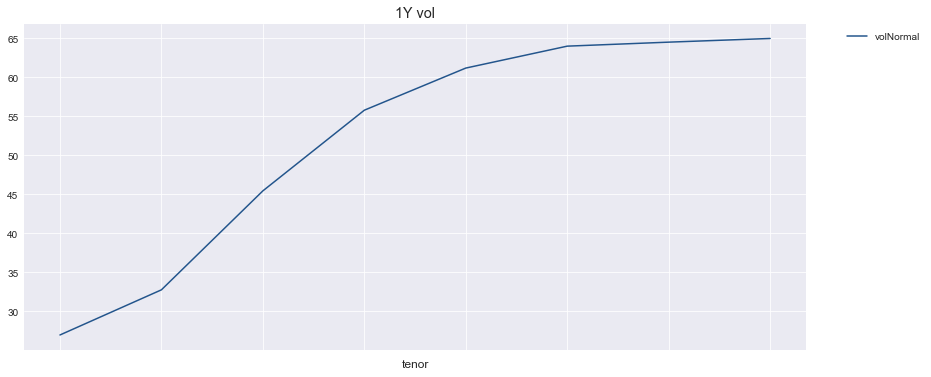

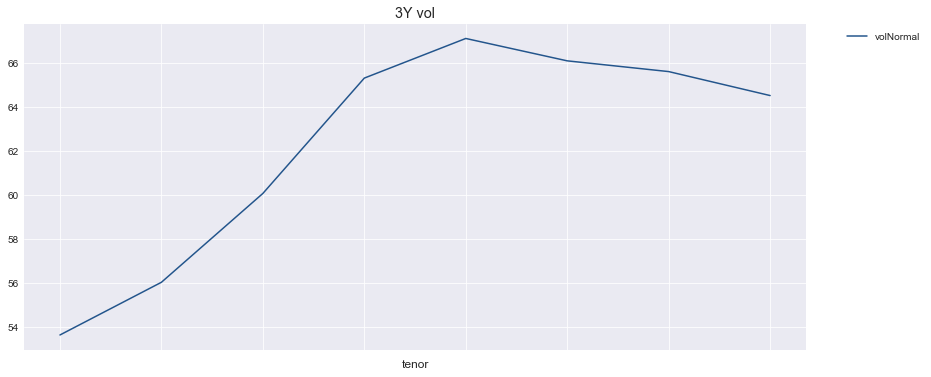

In [9]:
dic_req_fix = {'date': pd.Timestamp('2017-04-18'),'expiry': '1Y'}
# use the slicer according to what you are looking for
v1_1 = ep.slice(res1, x='tenor', dic_req_fix=dic_req_fix, value='volNormal')

dic_req_fix = {'date': pd.Timestamp('2017-04-18'),'expiry': '3Y'}
# use the slicer according to what you are looking for
v1_2 = ep.slice(res1, x='tenor', dic_req_fix=dic_req_fix, value='volNormal')

Plot.line(v1_1.df_pivot*10000*unit, figsize=(14, 6), title='1Y vol')
Plot.line(v1_2.df_pivot*10000*unit, figsize=(14, 6), title='3Y vol')

### 3.1.3 Get vol surface changes between two dates

In [10]:
# define the second date: here a week before"
dic_req_fix_2 = {'date': pd.Timestamp('2017-03-17')} 
# slice 
v2 = ep.slice(res1, x='expiry', y='tenor', dic_req_fix=dic_req_fix_2, value='volNormal')

# get the vol surface changes
vol_matrix_2 = round((v2.df_pivot*10000)*unit,2)
vol_change = vol_matrix-vol_matrix_2
vol_change

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,3.67,2.23,-1.31,-2.07,-1.71,-0.74,-0.05,2.87
3M,-1.30,-2.62,-2.47,-3.01,-3.71,-3.36,-2.69,-0.04
6M,-3.32,-3.87,-3.81,-3.06,-2.20,-2.09,-1.62,0.44
1Y,-7.02,-5.99,-4.35,-3.17,-1.80,-2.03,-2.21,-0.33
3Y,-4.90,-4.31,-2.56,-1.79,-1.38,-0.92,-0.47,0.10
5Y,-1.63,-1.18,-1.07,-0.99,-1.42,-1.01,-0.55,0.37
10Y,0.77,0.48,-0.54,-0.80,-1.00,-0.72,-0.40,0.18
15Y,0.21,-0.47,-0.75,-1.00,-1.09,-0.80,-0.40,0.05
20Y,-0.02,-0.56,-1.08,-1.07,-0.94,-0.78,-0.29,0.30


### 3.1.4 - Create heatmap of vol surface changes

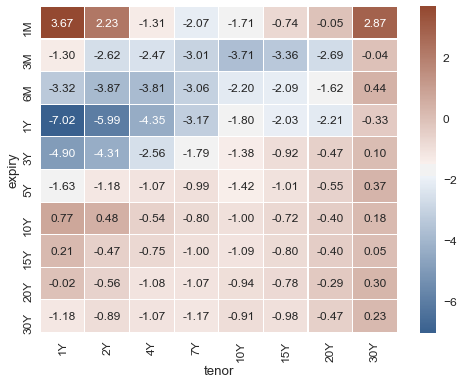

In [11]:
v = vol_change.stack().reset_index().pivot('expiry','tenor', 0)
column_order, index_order = vol_matrix.columns, vol_matrix.index
v = v.reindex(column_order, axis=1).reindex(index_order, axis=0)

# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.heatmap(v, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-BuRd')

## 3.2 - Create Forward surface

### 3.2.1 - Get forward surface on one date

In [12]:
# define the date
dic_req_fix = {'date': pd.Timestamp('2017-04-18')}
# use the slicer according to what you are looking for
f1 = ep.slice(res1, x='expiry', y='tenor', dic_req_fix=dic_req_fix, value='forwardRate')

# get the vol surface
fwd_matrix = round((f1.df_pivot*10000), 2)
fwd_matrix

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,-21.59,-14.84,2.39,36.43,69.24,104.38,118.87,125.60
3M,-19.58,-12.57,5.47,39.87,72.47,106.65,120.46,126.61
6M,-16.37,-8.96,10.21,45.25,77.34,110.06,122.83,128.13
1Y,-9.43,-1.25,20.19,56.29,87.23,116.84,127.49,131.09
3Y,29.14,42.08,67.72,101.50,124.06,140.90,144.09,141.94
5Y,80.79,93.44,116.42,140.38,152.92,158.17,155.83,149.67
10Y,176.62,178.60,181.99,181.00,176.45,167.57,160.93,150.91
15Y,180.65,177.72,172.88,165.47,159.26,152.59,147.60,136.56
20Y,155.21,153.09,149.14,145.21,142.76,138.90,134.97,122.96


### 3.2.2 - Get fwd surface change between to dates

In [13]:
# define the second date: here a week before"
dic_req_fix_2 = {'date': pd.Timestamp('2017-04-12')} 
# slice 
f2 = ep.slice(res1, x='expiry', y='tenor', dic_req_fix=dic_req_fix_2, value='forwardRate')

# get the vol surface changes
fwd_matrix_2 = round((f2.df_pivot*10000),2)
fwd_change = fwd_matrix-fwd_matrix_2
fwd_change

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,-0.66,-0.50,-1.30,-2.23,-3.33,-3.81,-4.18,-4.68
3M,-0.56,-0.57,-1.34,-2.37,-3.37,-3.84,-4.22,-4.72
6M,-0.47,-0.75,-1.46,-2.62,-3.49,-3.91,-4.31,-4.77
1Y,-0.34,-1.06,-1.70,-3.01,-3.69,-4.05,-4.48,-4.88
3Y,-2.22,-2.20,-3.08,-4.31,-4.46,-4.71,-5.11,-5.24
5Y,-3.17,-4.07,-5.05,-5.27,-5.20,-5.34,-5.65,-5.57
10Y,-4.42,-5.13,-4.89,-5.11,-5.41,-5.85,-5.80,-5.59
15Y,-4.07,-5.04,-5.40,-5.78,-6.22,-6.01,-5.80,-5.67
20Y,-6.85,-6.01,-6.60,-6.64,-6.14,-5.80,-5.56,-5.66


### 3.2.3 Forward changes heatmap

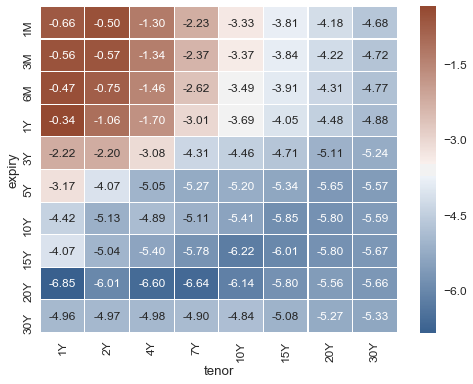

In [14]:
f = fwd_change.stack().reset_index().pivot('expiry', 'tenor', 0)
column_order, index_order = fwd_matrix.columns, fwd_matrix.index
f = f.reindex(column_order, axis=1).reindex(index_order, axis=0)

# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.heatmap(f, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-BuRd')

### 3.2.4 - 3d surface plot forward

In [15]:
# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.surface3D(f1.df_pivot*10000, z_label='forwardRate', z_round=2)

## 3.3 - Historical ATM vol

### 3.3.1 - Get historical vol data - Ex: 6m10Y 

In [16]:
# define the second date: here a week before"
dic_req_fix_2 = {'expiry': '6M', 'tenor':'10Y'} 
# slice 
v3 = ep.slice(res1, x='date', dic_req_fix=dic_req_fix_2, value='volNormal')

# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.highstock(v3.df_pivot.dropna()*10000*unit, title='volNormal')

<IPython.core.display.Javascript object>

### 3.3.2 - Get historical vol data - Ex: 6m4Y & 6m10Y

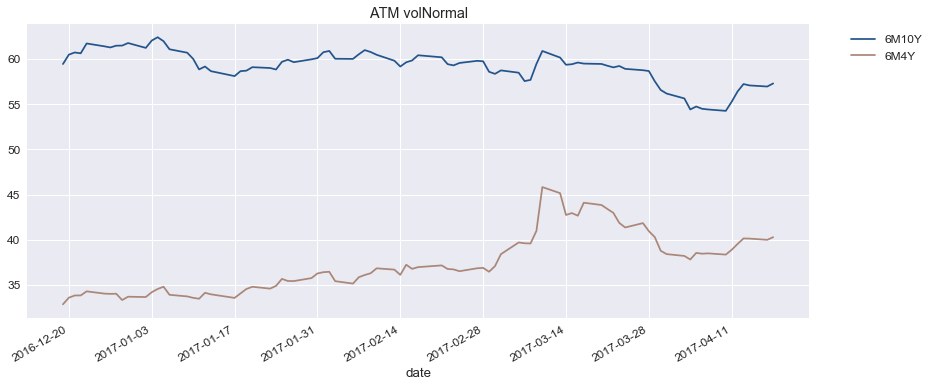

In [17]:
# define the second date: here a week before"
dic_req_fix_2 = {'expiry': '6M', 'tenor':'4Y'} 
# slice 
v4 = ep.slice(res1, x='date', dic_req_fix=dic_req_fix_2, value='volNormal')

v=pd.concat([v3.df_pivot,v4.df_pivot],axis=1)
v.columns=["6M10Y","6M4Y"]

# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.line(v.dropna()*10000*unit, figsize=(14, 6), title='ATM volNormal')

In [18]:
# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.highstock(v.dropna()*10000*unit, title='ATM volNormal')

<IPython.core.display.Javascript object>

### 3.3.3 - Implied vs level, implied vs realized vol

### 3.3.3.a Implied vs level

In [19]:
# Get 1m4Y forard rates:

# define the second date: here a week before"
dic_req_fix_2 = {'expiry': '1M', 'tenor':'4Y'} 
# slice 
v4 = ep.slice(res1, x='date', dic_req_fix=dic_req_fix_2, value='volNormal')

dic_req_fix_2 = {'expiry': '1M', 'tenor':'4Y'} 
# slice 
f4 = ep.slice(res1, x='date', dic_req_fix=dic_req_fix_2, value='forwardRate')

v=pd.concat([v4.df_pivot*10000*unit,f4.df_pivot*10000],axis=1).dropna()

# add save=True, save_folder='??', name='??' to save the plot on disk
Plot.highstock(v, title='1M4Y')

<IPython.core.display.Javascript object>

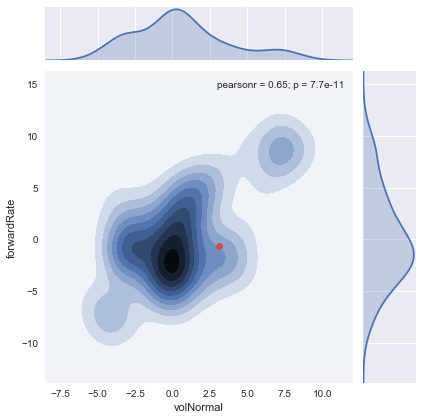

In [20]:
import seaborn as sns

# levels and corresponding returns
level_=v
return_=v.diff().dropna()

# resampling at lower frequency (is not cumulative)
resam_d = 5 # 5 = weekly
resampling = [0+resam_d*i for i in range(len(level_)//resam_d)]
level_resamp = level_.iloc[resampling]

# cumulative if lower frequency returns
window_size = 5
return_w = return_.rolling(center=False,window=window_size).sum().dropna()

with sns.axes_style('darkgrid'):
    sns.set(color_codes=True)
    g = sns.jointplot('volNormal','forwardRate',data=return_w,kind='kde',color='b')
    g.ax_joint.plot(return_w['volNormal'].iloc[-1],return_w['forwardRate'].iloc[-1],'ro')

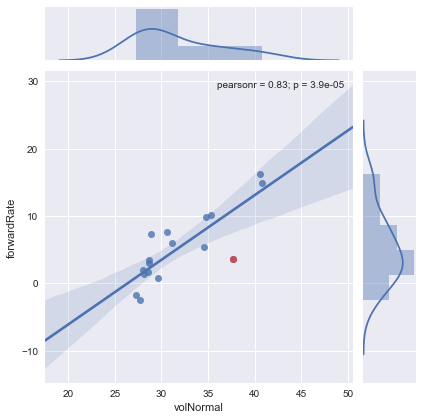

In [21]:
with sns.axes_style('darkgrid'):
    g = sns.jointplot('volNormal','forwardRate',data=level_resamp,kind='reg',color='b')
    g.ax_joint.plot(level_resamp['volNormal'].iloc[-1],level_resamp['forwardRate'].iloc[-1],'ro')

### Comparison vs. Model

In [22]:
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score

intercept=True

x = return_w['forwardRate'].values
x = x.reshape(len(x),1)
y = return_w['volNormal'].values
y = y.reshape(len(y),1)
model = linear_model.LinearRegression(intercept)
model.fit(x,y)
y_hat = model.predict(y)

beta = model.coef_[0][0]
R_sqr = r2_score(y,y_hat)
if intercept:
    intercept_val = model.intercept_[0]
params = [round(e, 2) for e in [beta, intercept_val, R_sqr]]
    
y = pd.DataFrame(y)
y_hat = pd.DataFrame(y_hat)
r = pd.concat([y,y_hat],axis=1)
r.columns = ['y','h hat']
r.index = return_w.index
Plot.highstock(r, title='Model beta={} intercept={} R-sqr={}'.format(*[str(e) for e in params]))

<IPython.core.display.Javascript object>

# 4 - 3D Slicer
+ Extract results from API response as 3D cube - represented as multi index dataframe

## 4.1 - Example

In [23]:
# no fixed param
dic_req_fix = {}

# use the slicer for what you want to extract
s3 = ep.slice(res1, x='expiry', y='date', z='tenor', dic_req_fix=dic_req_fix, value='volNormal', y_pos='index')

# define unit
unit = biz.vol_unit('y')
multi_frame = s3.df_pivot.dropna()*10000*unit

s3.df_slice.info()
round(multi_frame.head(10),2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 4 columns):
expiry       6800 non-null object
date         6800 non-null datetime64[ns]
tenor        6800 non-null object
volNormal    6800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 212.6+ KB


tenor                 1Y     2Y     4Y     7Y    10Y    15Y    20Y    30Y
expiry date                                                              
1M     2016-12-19  14.23  17.15  29.61  47.61  60.00  67.12  71.21  76.64
       2016-12-20  14.00  16.92  30.41  48.49  61.23  68.39  72.11  77.93
       2016-12-21  13.77  16.96  29.89  46.92  58.71  66.21  69.75  74.75
       2016-12-22  14.05  17.24  29.44  46.47  58.58  65.70  69.60  74.51
       2016-12-23  14.39  17.74  30.75  48.25  60.65  67.88  71.73  76.95
       2016-12-26  13.37  16.46  28.57  44.72  56.23  63.15  66.63  71.29
       2016-12-27  13.10  16.25  28.19  43.92  55.30  62.04  65.52  70.20
       2016-12-28  13.20  17.40  29.85  46.57  58.68  65.97  69.81  74.51
       2016-12-29  13.51  17.73  29.34  47.13  59.24  66.22  70.11  75.11
       2016-12-30  13.68  17.89  29.80  47.82  60.34  67.42  71.51  76.96

In [24]:
multi_frame.index.names

FrozenList(['expiry', 'date'])

In [25]:
multi_frame.index.get_level_values('expiry').unique()

Index(['1M', '3M', '6M', '1Y', '3Y', '5Y', '10Y', '15Y', '20Y', '30Y'], dtype='object', name='expiry')

In [26]:
multi_frame.index.get_level_values('date').unique()

DatetimeIndex(['2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
               '2016-12-23', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30', '2017-01-02', '2017-01-03',
               '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09',
               '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26',
               '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07',
               '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
      

## 4.2 - Helper functions
+ To make data extraction and manipulation simpler the ROTB package contains a number of helper functions

In [27]:
for f in dir(ROTB.biz):
    if not (f.startswith('__') or f in ['np', 'pd', 'ROUND_NB_DIGIT']):
        print(f)

build_spread
build_weight
drop_level
get_diff
get_max
get_mean
get_min
get_percentile
get_std
get_surface
get_z_score
select_data
vol_unit


## 4.2 - Get Dates

In [28]:
# get days vector to slice the multi-index frame

# Select the end date (here the last observation):
end_dt = multi_frame.index.get_level_values('date')[-1]
print(end_dt)

# Or define it:
end_dt = pd.Timestamp.strptime('2017-4-18','%Y-%m-%d')
print(end_dt)

# set the starting date
# either by selecting the number of observations
nb_days = 21
start_dt = multi_frame.index.get_level_values('date')[-nb_days]
print(start_dt)

# or by defining it:
start_dt = pd.Timestamp.strptime('2017-4-17','%Y-%m-%d')
print(start_dt)

# or relatively to the end_dt:
from pandas.tseries.offsets import *
start_dt = end_dt - BDay(nb_days)
print(start_dt)

2017-04-18 00:00:00
2017-04-18 00:00:00
2017-03-21 00:00:00
2017-04-17 00:00:00
2017-03-20 00:00:00


## 4.3 - Vol Surface

In [29]:
surface = biz.get_surface(multi_frame, end_dt)
surface

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,19.96,24.39,39.94,49.71,53.17,58.32,61.05,65.32
3M,20.60,26.44,39.18,50.59,54.41,59.34,62.51,64.74
6M,20.15,26.59,40.30,51.69,57.30,61.65,63.83,65.25
1Y,26.98,32.77,45.46,55.80,61.21,64.02,64.53,65.00
3Y,53.62,56.02,60.05,65.29,67.09,66.08,65.59,64.50
5Y,68.33,67.82,68.32,69.75,70.03,66.74,65.24,63.39
10Y,71.96,72.34,71.59,70.75,69.38,63.79,60.79,57.11
15Y,67.31,67.17,66.88,65.59,64.03,58.20,54.37,49.69
20Y,62.76,62.76,62.01,60.49,58.50,52.91,48.59,43.95


In [30]:
surface_change = biz.get_diff(multi_frame, start_dt, end_dt)
surface_change

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,3.95,1.49,-1.08,-2.26,-1.69,-1.06,-0.14,3.06
3M,-1.25,-1.97,-1.78,-2.09,-2.98,-2.56,-1.88,0.68
6M,-3.14,-4.10,-3.56,-2.98,-2.16,-2.29,-1.42,0.62
1Y,-6.92,-5.91,-3.94,-3.12,-1.80,-2.11,-2.58,-0.29
3Y,-4.28,-4.16,-2.82,-1.87,-1.37,-0.96,-0.60,0.04
5Y,-2.25,-1.87,-1.38,-1.34,-1.41,-1.00,-0.50,0.39
10Y,-0.01,-0.52,-0.91,-0.96,-1.11,-0.70,-0.34,0.19
15Y,-0.16,-0.78,-1.08,-1.02,-1.08,-0.78,-0.42,0.05
20Y,0.46,-0.41,-1.18,-0.96,-0.96,-0.65,-0.23,0.34


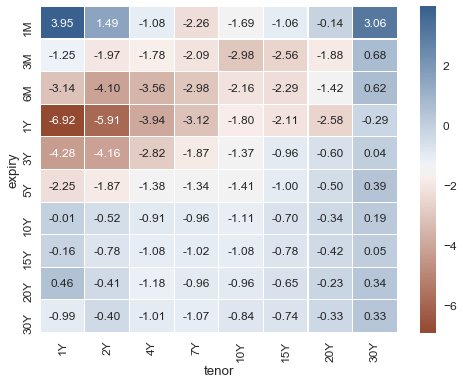

In [31]:
Plot.heatmap(surface_change, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-RdBu')

## 4.4 - Slice the dataframe: Reducing date and expiry spaces
+ Manually
+ Whith helper function

### 4.4.1 Range of dates

In [32]:
# MANUALLY
# Without function for a range of dates:
mask = (multi_frame.index.get_level_values('date') >= start_dt) & \
       (multi_frame.index.get_level_values('date') <= end_dt)
new_frame = multi_frame.loc[mask]

# HELPER
args = ('date', start_dt, end_dt, 'range')
new_frame_f = biz.select_data(multi_frame, args)

print(all(new_frame)==all(new_frame_f))
print(new_frame.index.get_level_values('date').unique())

True
DatetimeIndex(['2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10',
               '2017-04-11', '2017-04-12', '2017-04-13', '2017-04-14',
               '2017-04-17', '2017-04-18'],
              dtype='datetime64[ns]', name='date', freq=None)


### 4.4.2 A few dates

In [33]:
# MANUALLY
mask = (multi_frame.index.get_level_values('date')== start_dt) | \
       (multi_frame.index.get_level_values('date') == end_dt)
new_frame = multi_frame.loc[mask]

# HELPER
args=('date', start_dt, end_dt)
new_frame_f = biz.select_data(multi_frame,args)

print(all(new_frame)==all(new_frame_f))
print(new_frame.index.get_level_values('date').unique())

True
DatetimeIndex(['2017-03-20', '2017-04-18'], dtype='datetime64[ns]', name='date', freq=None)


### 4.4.3 Expiries

In [34]:
# MANUALLY
mask = (multi_frame.index.get_level_values('expiry')== '1M') | \
       (multi_frame.index.get_level_values('expiry') == '3M')
new_frame = multi_frame.loc[mask]

# HELPER
args=('expiry','1M','3M')
new_frame_f = biz.select_data(multi_frame,args)

print(all(new_frame)==all(new_frame_f))
print(new_frame.index.get_level_values('expiry').unique())

True
Index(['1M', '3M'], dtype='object', name='expiry')


## 4.5 - Min-Max-Quantile-ZScore matrix over a period

### 4.5.1 - Max surface

In [35]:
args=('date',start_dt,end_dt,'range')
new_frame = biz.select_data(multi_frame,args)

# MANUALLY
max_surface = new_frame.groupby(level='expiry').apply(max)
max_surface = max_surface.reindex(index_order, axis=0)
max_surface = round(max_surface,2)

# HELPER: on original date (resizing in function)
print (all(max_surface)==all(biz.get_max(multi_frame, True, args)))

# HELPER: on resized date (resizing in the function)
print (all(max_surface)==all(biz.get_max(new_frame)))

max_surface

True
True


tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,20.49,24.39,41.03,51.97,54.86,59.38,61.60,65.55
3M,21.85,28.40,41.45,52.68,57.39,61.90,64.40,64.74
6M,23.30,30.69,43.86,54.67,59.46,63.95,65.25,65.25
1Y,33.90,38.69,49.78,59.19,63.18,66.12,67.11,65.29
3Y,59.52,61.36,63.73,67.60,68.73,67.22,66.30,65.30
5Y,71.06,70.06,69.90,71.20,71.48,67.77,66.19,64.14
10Y,72.77,73.23,72.50,71.70,70.49,64.49,61.22,57.32
15Y,67.89,68.37,67.96,66.60,65.12,58.98,54.79,49.69
20Y,63.50,64.01,63.32,61.45,59.46,53.57,48.82,43.97


### 4.5.2 - Min surface

In [36]:
min_surface = biz.get_min(multi_frame, True, args)
min_surface

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,12.37,17.73,33.30,43.73,48.23,52.49,54.58,57.24
3M,16.72,23.57,35.00,45.89,50.03,54.17,56.26,57.07
6M,19.06,25.83,37.83,48.65,54.27,58.07,59.68,59.86
1Y,26.35,32.32,44.19,54.15,59.63,62.09,62.84,62.93
3Y,52.71,55.55,59.56,64.15,66.06,65.02,64.42,63.60
5Y,67.22,66.70,67.79,69.16,69.57,66.35,64.82,62.31
10Y,71.09,71.58,71.30,70.52,69.19,63.52,60.28,55.97
15Y,66.91,67.16,66.57,65.41,63.76,57.96,53.81,48.16
20Y,61.83,62.40,61.85,60.26,58.12,52.70,48.00,42.47


### 4.5.3 - Max-Min surface

In [37]:
round(max_surface-min_surface, 2)

tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,8.12,6.66,7.73,8.24,6.63,6.89,7.02,8.31
3M,5.13,4.83,6.45,6.79,7.36,7.73,8.14,7.67
6M,4.24,4.86,6.03,6.02,5.19,5.88,5.57,5.39
1Y,7.55,6.37,5.59,5.04,3.55,4.03,4.27,2.36
3Y,6.81,5.81,4.17,3.45,2.67,2.20,1.88,1.70
5Y,3.84,3.36,2.11,2.04,1.91,1.42,1.37,1.83
10Y,1.68,1.65,1.20,1.18,1.30,0.97,0.94,1.35
15Y,0.98,1.21,1.39,1.19,1.36,1.02,0.98,1.53
20Y,1.67,1.61,1.47,1.19,1.34,0.87,0.82,1.50


### 4.5.4 - Max-Today surface

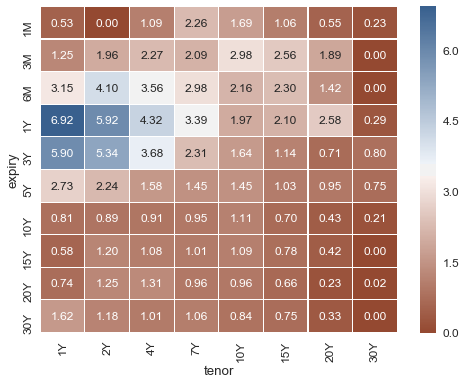

In [38]:
max_today = max_surface-surface
Plot.heatmap(max_today, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-RdBu')

### 4.5.5 - Today-Min surface

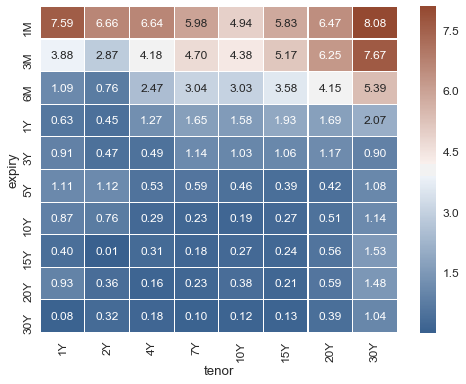

In [39]:
min_today = round(surface-min_surface, 2)
Plot.heatmap(min_today, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-BuRd')

### 4.5.6 - Quantiles

In [40]:
   
# MANUALLY
percentile = new_frame.groupby(level='expiry').rank(pct=True)
mask = (percentile.index.get_level_values('date') == end_dt)
percentile_surface = percentile.loc[mask]
percentile_surface.index = percentile_surface.index.droplevel('date')
p = round(percentile_surface, 2)
p2 = biz.get_percentile(new_frame, end_dt)

# HELPER
args = ('date',start_dt,end_dt,'range')
p3=biz.get_percentile(multi_frame,end_dt,True,args)

print(all(p)==all(p2))
print(all(p2)==all(p3))
p3

True
True


tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,0.86,1.00,0.86,0.73,0.68,0.77,0.77,0.91
3M,0.91,0.77,0.73,0.73,0.68,0.64,0.73,1.00
6M,0.55,0.45,0.64,0.59,0.64,0.68,0.64,1.00
1Y,0.27,0.18,0.64,0.64,0.64,0.55,0.50,0.82
3Y,0.23,0.14,0.41,0.50,0.45,0.45,0.45,0.77
5Y,0.32,0.41,0.50,0.41,0.36,0.32,0.45,0.77
10Y,0.68,0.32,0.27,0.41,0.36,0.50,0.64,0.82
15Y,0.36,0.09,0.27,0.41,0.45,0.68,0.82,1.00
20Y,0.45,0.27,0.18,0.41,0.59,0.64,0.95,0.95


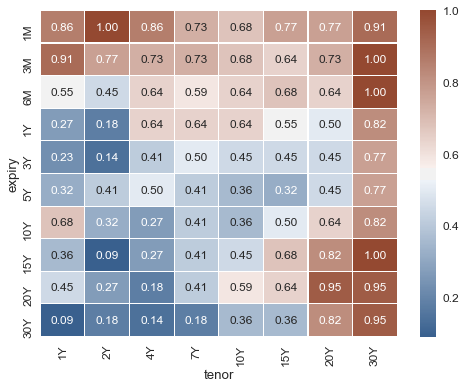

In [41]:
Plot.heatmap(p3, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-BuRd')

### 4.5.7 - Mean

In [42]:
# MANUALLY
mean = new_frame.groupby(level='expiry').apply(np.mean)
mean = round(mean.reindex(index_order, axis=0),2)

# HELPER
mean2 = biz.get_mean(new_frame)

print(all(mean)==all(mean2))
mean2

True


tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,15.57,20.81,37.12,47.58,51.55,56.12,58.53,61.35
3M,18.55,25.52,37.74,49.18,53.67,58.13,60.66,61.31
6M,20.45,27.21,40.14,51.38,56.91,60.99,62.86,62.96
1Y,28.96,34.09,46.09,56.19,61.30,64.11,64.87,64.39
3Y,55.15,57.51,61.01,65.79,67.43,66.25,65.58,64.33
5Y,68.96,68.30,68.78,70.24,70.58,67.18,65.41,63.12
10Y,71.80,72.51,71.93,70.98,69.64,63.86,60.74,56.81
15Y,67.39,67.73,67.24,65.88,64.14,58.23,54.23,48.98
20Y,62.83,63.23,62.63,60.77,58.52,52.94,48.37,43.24


### 4.5.8 - Standard Dev

In [43]:
# MANUALLY
std=new_frame.groupby(level='expiry').apply(np.std)
std=std.reindex(index_order, axis=0)
std=round(std,2)

# HELPER
std2 = biz.get_mean(new_frame)

print(all(std)==all(std2))
std

True


tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,2.59,2.16,2.45,2.44,2.17,2.35,2.48,2.68
3M,1.52,1.39,1.98,2.14,2.21,2.34,2.48,2.54
6M,1.22,1.35,1.75,1.87,1.76,1.88,1.93,1.86
1Y,2.32,1.86,1.80,1.63,1.22,1.33,1.33,0.78
3Y,1.99,1.70,1.32,1.17,0.89,0.71,0.55,0.40
5Y,1.23,1.09,0.78,0.68,0.67,0.51,0.37,0.50
10Y,0.39,0.45,0.36,0.32,0.31,0.24,0.26,0.42
15Y,0.29,0.38,0.41,0.33,0.29,0.23,0.22,0.50
20Y,0.48,0.50,0.53,0.37,0.27,0.20,0.19,0.48


### 4.5.9 - Z-Score

In [44]:
# MANUALLY
mask = (new_frame.index.get_level_values('date') == end_dt)
data_end_dt = new_frame.loc[mask]
data_end_dt.index = data_end_dt.index.droplevel('date')
data_end_dt = round(data_end_dt,2)
zscore = (data_end_dt-mean)/std
zscore = round(zscore,2)

# SEMI MANUALLY
zscore2 = round((biz.get_surface(new_frame,end_dt)-biz.get_mean(new_frame))/biz.get_std(new_frame),2)

# HELPER
zscore3=biz.get_z_score(new_frame, end_dt)

print(all(zscore)==all(zscore2))
print(all(zscore)==all(zscore3))

zscore3

True
True


tenor,1Y,2Y,4Y,7Y,10Y,15Y,20Y,30Y
expiry,,,,,,,,
1M,1.69,1.66,1.15,0.87,0.75,0.94,1.02,1.48
3M,1.35,0.66,0.73,0.66,0.33,0.52,0.75,1.35
6M,-0.25,-0.46,0.09,0.17,0.22,0.35,0.50,1.23
1Y,-0.85,-0.71,-0.35,-0.24,-0.07,-0.07,-0.26,0.78
3Y,-0.77,-0.88,-0.73,-0.43,-0.38,-0.24,0.02,0.43
5Y,-0.51,-0.44,-0.59,-0.72,-0.82,-0.86,-0.46,0.54
10Y,0.41,-0.38,-0.94,-0.72,-0.84,-0.29,0.19,0.71
15Y,-0.28,-1.47,-0.88,-0.88,-0.38,-0.13,0.64,1.42
20Y,-0.15,-0.94,-1.17,-0.76,-0.07,-0.15,1.16,1.48


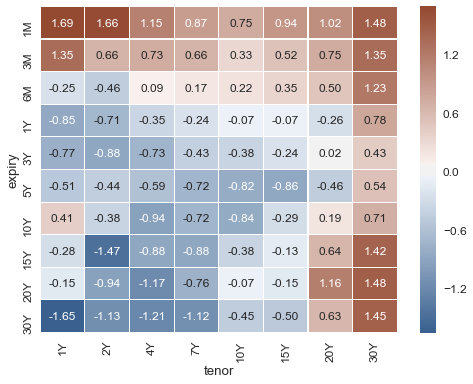

In [45]:
Plot.heatmap(zscore3, annot=True, annot_kws={"size": 12}, figsize=(8, 6), fmt='.2f', cmap='SG-BuRd')

## 4.6 - Slope and Calendar Spread

### 4.6.1 - Slope

In [46]:
# Declare all the spread
spread = [
("2Y","4Y"),("2Y","10Y"),("2Y","20Y"),("2Y","30Y"), ("4Y","10Y"), \
("4Y","20Y"),("4Y","30Y"), ("10Y","20Y"),("10Y","30Y"),("20Y","30Y")
]

slope = biz.build_spread(multi_frame, spread,axis='Tenor')
# you could also specified weights:
w = [-1,1]
slope2 = biz.build_spread(multi_frame,spread, 'T', w)

print(all(slope)==all(slope2))
slope2.head(10)

spread - weight len mismatch by default spread weighted (-1,1)
True


2Y4Y      2Y10Y      2Y20Y      2Y30Y      4Y10Y  \
expiry date                                                                
1M     2016-12-19  12.462621  42.853502  54.058757  59.493348  30.390881   
       2016-12-20  13.496749  44.315779  55.191190  61.009214  30.819030   
       2016-12-21  12.935516  41.754533  52.795081  57.794844  28.819016   
       2016-12-22  12.198724  41.340780  52.354510  57.266799  29.142056   
       2016-12-23  13.005348  42.900401  53.989987  59.202101  29.895053   
       2016-12-26  12.102916  39.766202  50.167212  54.831419  27.663286   
       2016-12-27  11.940320  39.054916  49.271232  53.953264  27.114596   
       2016-12-28  12.450364  41.277220  52.408547  57.108886  28.826857   
       2016-12-29  11.614927  41.508844  52.376756  57.378087  29.893917   
       2016-12-30  11.915791  42.447030  53.617669  59.075911  30.531239   

                       4Y20Y      4Y30Y     10Y20Y     10Y30Y    20Y30Y  
expiry date                                                              
1M     2016-12-19  41.596136  47.030727  11.205255  16.639846  5.434591  
       2016-12-20  41.694441  47.512465  10.875411  16.693435  5.818024  
       2016-12-21  39.859564  44.859327  11.040548  16.040311  4.999763  
       2016-12-22  40.155786  45.068075  11.013730  15.926019  4.912289  
       2016-12-23  40.984639  46.196753  11.089587  16.301700  5.212114  
       2016-12-26  38.064296  42.728503  10.401010  15.065217  4.664207  
       2016-12-27  37.330912  42.012943  10.216316  14.898348  4.682031  
       2016-12-28  39.958184  44.658523  11.131327  15.831666  4.700339  
       2016-12-29  40.761829  45.763160  10.867912  15.869243  5.001331  
       2016-12-30  41.701878  47.160120  11.170638  16.628881  5.458243

### 4.6.2 - Spread

In [47]:
# MANUALLY
mask = (slope.index.get_level_values('date') == end_dt)
slope_matrix = slope.loc[mask]
slope_matrix.index = slope_matrix.index.droplevel('date')
slope_matrix = round(slope_matrix, 2)

# SEMI MANUALLY
args = ('date', end_dt)
slope_matrix_f = round(biz.drop_level(biz.select_data(slope, args), args[0]), 2)

# HELPER:
slope_matrix_f2 = biz.get_surface(slope,end_dt)

print(all(slope_matrix)==all(slope_matrix_f))
print(all(slope_matrix)==all(slope_matrix_f2))
slope_matrix

True
True


,2Y4Y,2Y10Y,2Y20Y,2Y30Y,4Y10Y,4Y20Y,4Y30Y,10Y20Y,10Y30Y,20Y30Y
expiry,,,,,,,,,,
1M,-15.55,-28.78,-36.66,-40.93,-13.22,-21.11,-25.38,-7.88,-12.15,-4.27
3M,-12.74,-27.97,-36.08,-38.30,-15.23,-23.34,-25.56,-8.10,-10.33,-2.23
6M,-13.71,-30.71,-37.24,-38.66,-17.00,-23.53,-24.94,-6.54,-7.95,-1.41
1Y,-12.69,-28.44,-31.76,-32.23,-15.75,-19.07,-19.54,-3.32,-3.80,-0.47
3Y,-4.04,-11.08,-9.57,-8.48,-7.04,-5.54,-4.45,1.50,2.59,1.09
5Y,-0.50,-2.22,2.58,4.43,-1.72,3.08,4.93,4.79,6.64,1.85
10Y,0.74,2.95,11.54,15.22,2.21,10.80,14.48,8.59,12.27,3.68
15Y,0.28,3.13,12.80,17.48,2.85,12.52,17.19,9.67,14.34,4.68
20Y,0.75,4.26,14.17,18.81,3.51,13.41,18.06,9.91,14.55,4.64


### 4.6.3 - Changes

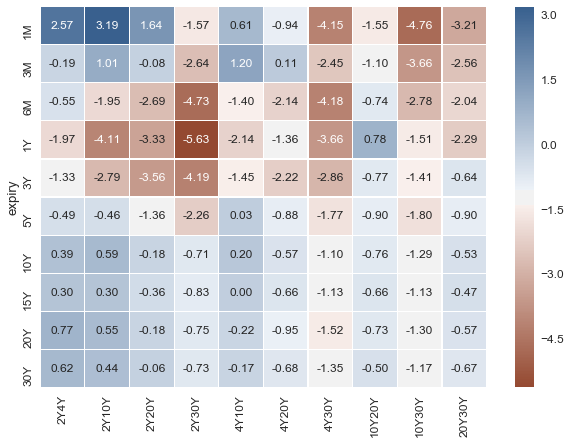

In [48]:
# HELPER
slope_chg = biz.get_diff(slope, start_dt, end_dt)

Plot.heatmap(slope_chg, annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-RdBu')

In [49]:
# biz.get_max(slope)

In [50]:
# biz.get_min(slope)

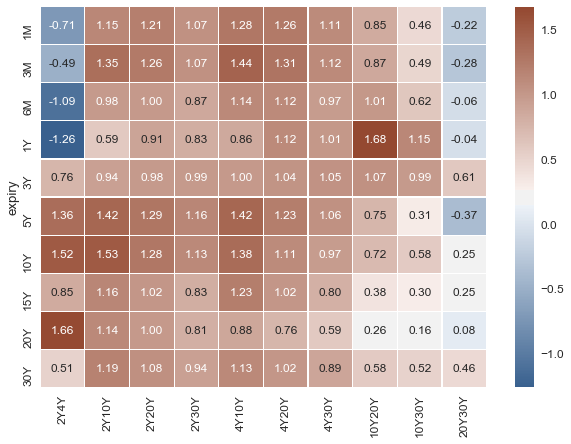

In [51]:
Plot.heatmap(biz.get_z_score(slope, end_dt),
             annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-BuRd')

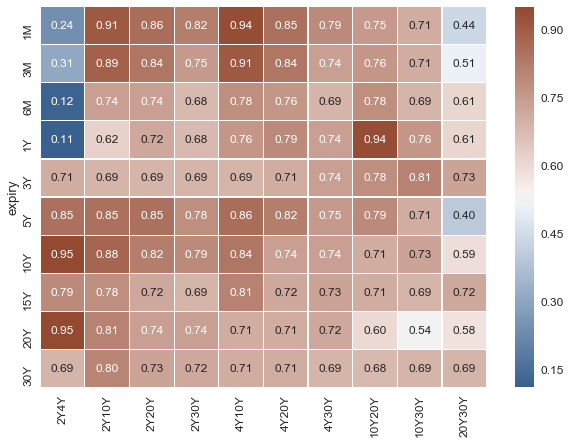

In [52]:
Plot.heatmap(biz.get_percentile(slope, end_dt),
             annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-BuRd')

### 4.6.4 - Flies

In [53]:
spread=[
('2Y','4Y','10Y'),('2Y','4Y','10Y'),('2Y','4Y','30Y'),('2Y','10Y','30Y'), \
('4Y','7Y','10Y'),('4Y','10Y','30Y'),('7Y','10Y','20Y'),('7Y','10Y','30Y'),\
('10Y','20Y','30Y')
]

kwargs = {'type': 'Fly'}
fly_t = biz.build_spread(multi_frame, spread, 'Tenor', kwargs=kwargs)
fly_t.head(10)

fly - weight len mismatch by default fly weighted (-1,2,-1)


2Y4Y10Y    2Y4Y30Y   2Y10Y30Y   4Y7Y10Y   4Y10Y30Y  \
expiry date                                                               
1M     2016-12-19 -17.928259 -34.568106  26.213656  5.606966  13.751034   
       2016-12-20 -17.322281 -34.015717  27.622343  5.334155  14.125595   
       2016-12-21 -15.883500 -31.923811  25.714222  5.242448  12.778706   
       2016-12-22 -16.943332 -32.869351  25.414761  4.905976  13.216037   
       2016-12-23 -16.889704 -33.191405  26.598701  5.097034  13.593352   
       2016-12-26 -15.560370 -30.625587  24.700985  4.640774  12.598069   
       2016-12-27 -15.174275 -30.072623  24.156568  4.339696  12.216248   
       2016-12-28 -16.376493 -32.208159  25.445554  4.605057  12.995190   
       2016-12-29 -18.278990 -34.148233  25.639601  5.681599  14.024674   
       2016-12-30 -18.615448 -35.244329  25.818149  5.508696  13.902358   

                   7Y10Y20Y  7Y10Y30Y  10Y20Y30Y  
expiry date                                       
1M     2016-12-19  1.186702 -4.247889   5.770664  
       2016-12-20  1.867026 -3.950998   5.057388  
       2016-12-21  0.747736 -4.252027   6.040785  
       2016-12-22  1.104310 -3.807979   6.101441  
       2016-12-23  1.309423 -3.902691   5.877473  
       2016-12-26  1.110246 -3.553961   5.736803  
       2016-12-27  1.171133 -3.510898   5.534285  
       2016-12-28  0.979573 -3.720766   6.430988  
       2016-12-29  1.238247 -3.763084   5.866581  
       2016-12-30  1.340633 -4.117610   5.712396

In [54]:
# biz.get_surface(fly_t,end_dt)

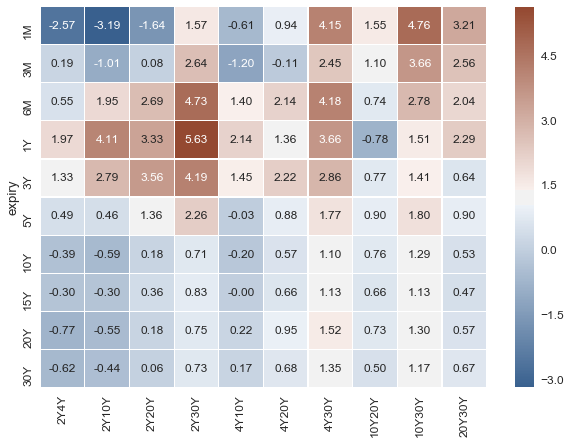

In [55]:
Plot.heatmap(biz.get_diff(slope, end_dt, start_dt),
             annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-BuRd')

In [56]:
# biz.get_max(fly_t)

In [57]:
# biz.get_min(fly_t)

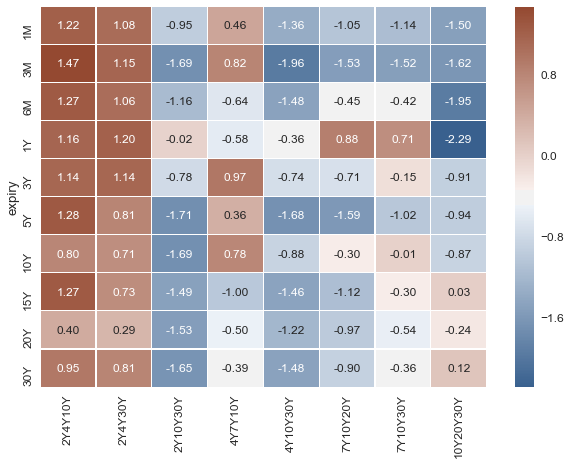

In [58]:
Plot.heatmap(biz.get_z_score(fly_t,end_dt),
             annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-BuRd')

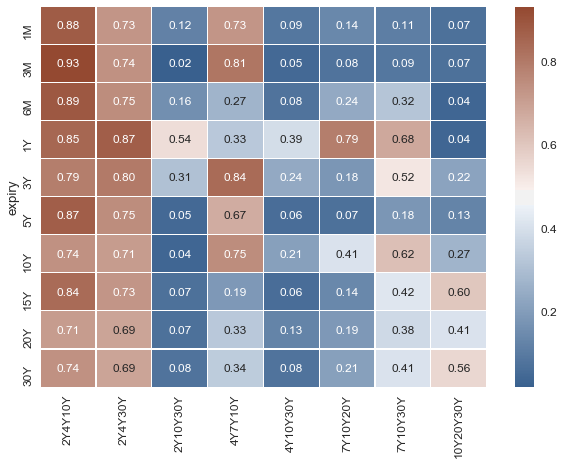

In [59]:
Plot.heatmap(biz.get_percentile(fly_t,end_dt),
             annot=True, annot_kws={"size": 12}, figsize=(10, 7), fmt='.2f', cmap='SG-BuRd')